In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class pagina:
    def __init__(self, n, bitR):
        self.n = n
        self.bitR = bitR

In [18]:
def imprimindo_fila(fila):
    for i in range(len(fila)):
        if i == len(fila) - 1:
            print(str(fila[-1].n) + "(" + str(int(fila[-1].bitR)) + ").")
        else:
            print(str(fila[i].n) + "(" + str(int(fila[i].bitR)) + "), ", end="")

In [5]:
def verif_pag(p, fila):
    for i in range(len(fila)):
        if fila[i].n == p:
            fila[i].bitR = True
            return True
    return False

In [20]:
def segunda_chance(paginas, capacidade):
    fila = []
    pageFault = 0
    hit = 0

    print("Memória vazia!")
    for p in paginas:
        print("\nInserindo a página de valor: " + str(p))

        if verif_pag(p, fila):
            print("\nPágina encontrada na memória!")
            hit += 1
        
        else:
            pageFault += 1
            print("\nPágina não está presente na memória!")
            if len(fila) == capacidade:
                while len(fila) > 0 and fila[0].bitR == True:
                    pag = fila.pop(0)
                    pag.bitR = False
                    fila.append(pag)
                del fila[0]
            
            fila.append(pagina(p, False))
        
        imprimindo_fila(fila)
    
    return pageFault, hit
    

In [55]:
n = 20

paginas = []

for i in range(n):
    paginas.append(np.random.randint(0, n/2))

print("Páginas: " + str(paginas) + "\n")

frames = 3

pageFault, hit = segunda_chance(paginas, frames)

print("\nPageFaults: " + str(pageFault))
print("Hits: " + str(hit))

Páginas: [7, 7, 2, 2, 1, 1, 2, 0, 2, 2, 1, 5, 1, 6, 8, 7, 9, 8, 0, 6]

Memória vazia!

Inserindo a página de valor: 7

Página não está presente na memória!
7(0).

Inserindo a página de valor: 7

Página encontrada na memória!
7(1).

Inserindo a página de valor: 2

Página não está presente na memória!
7(1), 2(0).

Inserindo a página de valor: 2

Página encontrada na memória!
7(1), 2(1).

Inserindo a página de valor: 1

Página não está presente na memória!
7(1), 2(1), 1(0).

Inserindo a página de valor: 1

Página encontrada na memória!
7(1), 2(1), 1(1).

Inserindo a página de valor: 2

Página encontrada na memória!
7(1), 2(1), 1(1).

Inserindo a página de valor: 0

Página não está presente na memória!
2(0), 1(0), 0(0).

Inserindo a página de valor: 2

Página encontrada na memória!
2(1), 1(0), 0(0).

Inserindo a página de valor: 2

Página encontrada na memória!
2(1), 1(0), 0(0).

Inserindo a página de valor: 1

Página encontrada na memória!
2(1), 1(1), 0(0).

Inserindo a página de valor: 5

In [65]:
def segunda_chance_sp(paginas, capacidade):
    fila = []
    pageFault = 0
    hit = 0

    for p in paginas:

        if verif_pag(p, fila):
            hit += 1
        
        else:
            pageFault += 1
            if len(fila) == capacidade:
                while len(fila) > 0 and fila[0].bitR == True:
                    pag = fila.pop(0)
                    pag.bitR = False
                    fila.append(pag)
                del fila[0]
            
            fila.append(pagina(p, False))
        
    
    return pageFault, hit
    

In [103]:
n = 1000

paginas = []
pagesFault = []
hits = []
frames = []

for i in range(n):
    paginas.append(np.random.randint(0, n))

qtd = 100

for i in range(1, qtd + 1):
    frame = i
    pageFault, hit = segunda_chance_sp(paginas, frame)
    
    frames.append(frame)
    pagesFault.append(pageFault)
    hits.append(hit)

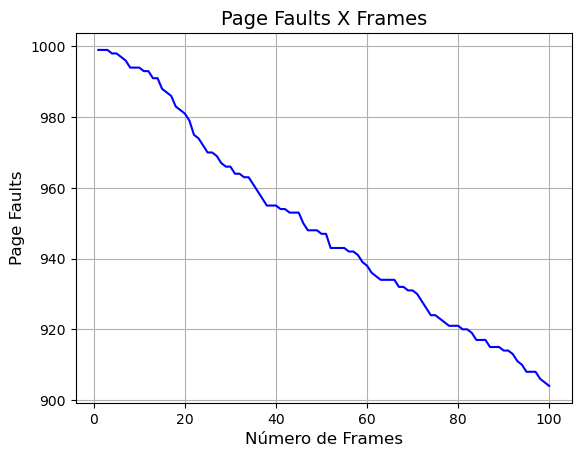

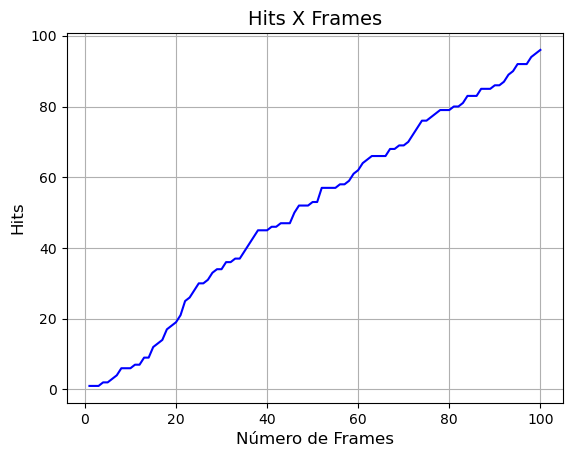

In [105]:
plt.plot(frames, pagesFault, linestyle='-', color='b')

plt.title('Page Faults X Frames', fontsize=14)
plt.xlabel('Número de Frames', fontsize=12)
plt.ylabel('Page Faults', fontsize=12)

plt.grid(True)

plt.show()

plt.plot(frames, hits, linestyle='-', color='b')

plt.title('Hits X Frames', fontsize=14)
plt.xlabel('Número de Frames', fontsize=12)
plt.ylabel('Hits', fontsize=12)

plt.grid(True)

plt.show()

In [106]:
qtd = 100
frame = 10
pags = []
pagesFault = []
hits = []

for i in range(1, qtd+1):
    paginas = []
    
    for j in range(1, i):
        paginas.append(np.random.randint(0, i))

    pageFault, hit = segunda_chance_sp(paginas, frame)
    
    pags.append(len(paginas))
    pagesFault.append(pageFault)
    hits.append(hit)

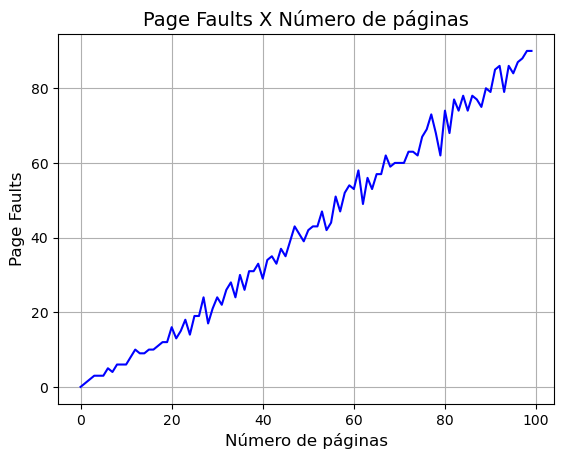

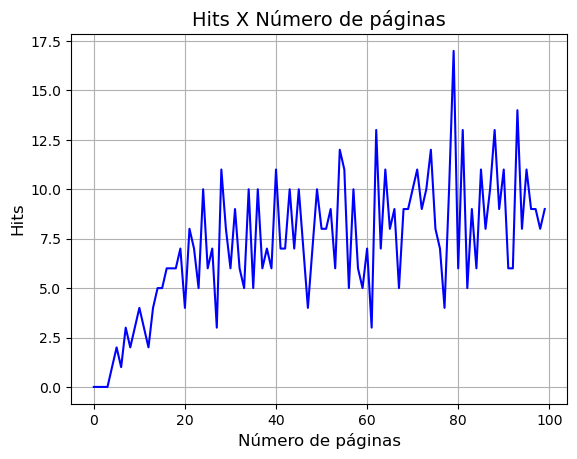

In [107]:
plt.plot(pags, pagesFault, linestyle='-', color='b')

plt.title('Page Faults X Número de páginas', fontsize=14)
plt.xlabel('Número de páginas', fontsize=12)
plt.ylabel('Page Faults', fontsize=12)

plt.grid(True)

plt.show()

plt.plot(pags, hits, linestyle='-', color='b')

plt.title('Hits X Número de páginas', fontsize=14)
plt.xlabel('Número de páginas', fontsize=12)
plt.ylabel('Hits', fontsize=12)

plt.grid(True)

plt.show()